# Avaliador de Ações



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from dotenv import dotenv_values
from os import system
from os.path import abspath

envVals = dotenv_values('.env')


In [3]:
# Fazendo busca dos dados do ticker

system(f"node ./scripts/getData.js {envVals['TICKER']}")

0

In [4]:
# Abrindo dados do ticker em um dataframe pandas

dataPath = abspath('./data') + '/' + envVals['TICKER'] + '.json'

df = pd.read_json(dataPath)

In [31]:
yahooTicker = envVals['TICKER'] + '.SA'

tk = yf.Ticker(yahooTicker)

tickerDf = tk.history('5y')

tickerDf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-24 00:00:00-03:00,3.546450,3.592671,3.428795,3.454006,14657367,0.0,0.0
2018-04-25 00:00:00-03:00,3.420391,3.462411,3.407785,3.432997,6611871,0.0,0.0
2018-04-26 00:00:00-03:00,3.432996,3.529641,3.432996,3.500227,10468319,0.0,0.0
2018-04-27 00:00:00-03:00,3.529641,3.550650,3.496025,3.550650,15990033,0.0,0.0
2018-04-30 00:00:00-03:00,3.563257,3.584267,3.529641,3.554853,11733680,0.0,0.0


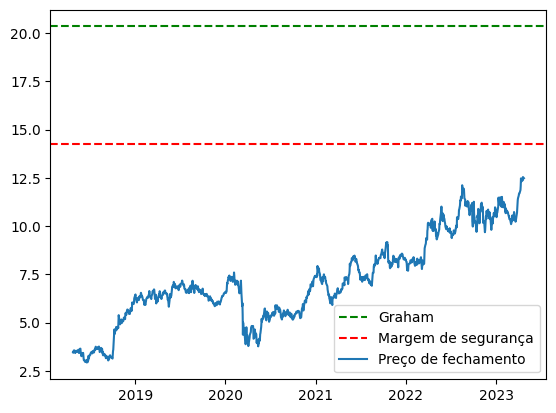

In [36]:
graham = np.sqrt(22.5 * df['VPA']['currentValue'] * df['LPA']['currentValue'])
safetyMargin = graham - float(envVals['SAFETY']) * graham

fig, ax = plt.subplots()

ax.axhline(y=graham, color='green', linestyle='dashed', label='Graham')
ax.axhline(y=safetyMargin, color='red', linestyle='dashed', label='Margem de segurança')
ax.plot(tickerDf['Close'], label='Preço de fechamento')

plt.legend()
plt.show()